In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Methode pour la generation de la matrice H_n
def genere_matrice_H(n):
    return np.array([[1/(1+i+j) for i in range(1,n+1)] for j in range(1,n+1)])

In [30]:
def calcul_errer(solution_interm,x_solution):
    """methode pour calculer les ecart entre les solutions intermediares et la solution finale

    Args:
        liste_errer (list(n)): liste des solution intermediares
        x_solution (list): la solution finale
    """
    return [np.linalg.norm(i-x_solution) for i in solution_interm] #Je calcule la norme de leur difference

# Methode de Jacobi

In [32]:
def my_jcaob(A,b,x_o,epsilon,max_iter):
    """methode pour la resolution avec metode de jacobi

    Args:
        A (list(n,n)): la matrice
        b (list): le y
        x_0 (list): valeur de depart
        episo (float): condition d'arret
        max_iter (int): nombre d'iteration maximale
    """
    M=np.diag(np.diag(A))
    M_inver=np.diag(1/np.diag(A))
    N=M-A
    J=M_inver@N
    b_=M_inver@b
    x_old=x_o.copy()
    solution_interm=[] #Pour stocker les solution intermediares
    for k in range(max_iter):
        x_new=J@x_old+b_
        solution_interm.append(x_new)
        if np.linalg.norm(x_new-x_old)<epsilon:
            break
        x_old=x_new.copy()
    errer=calcul_errer(solution_interm,x_new)
    return x_new.copy(),errer

# Test Methode Jacobi

Text(0, 0.5, "L'ecart à la solution finale")

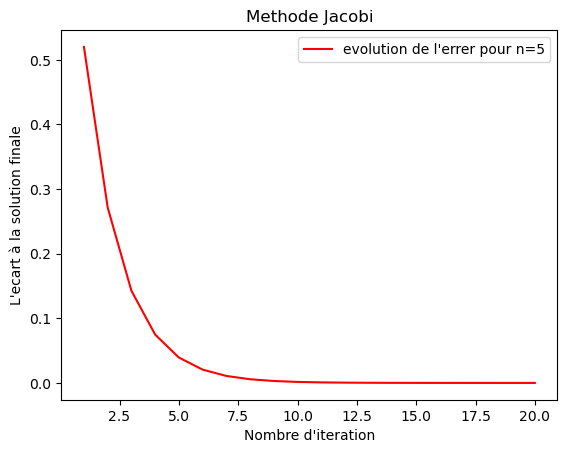

In [54]:
N=5
x,errer=my_jcaob(genere_matrice_H(N)+np.eye(N),np.array([1,1,1,1,1]),[1,1,1,1,1],1e-5,300)
plt.plot(np.arange(1,len(errer)+1),errer,label=f"evolution de l'errer pour n={N}",color='red')
plt.legend()
plt.title("Methode Jacobi")
plt.xlabel("Nombre d'iteration")
plt.ylabel("L'ecart à la solution finale")

# Methode de Gauss-Seidel

In [35]:
def my_gauss_seidal(A,b,x_o,epsilon,max_iter):
    n=len(A)
    D=np.diag(np.diag(A))
    E=A*np.array([[1 if i<j  else 0 for i in range(n)]for j in range(n)]) #pour avoir la matrice triangulaire inferieur
    F=A*np.array([[1 if i>j  else 0 for i in range(n)]for j in range(n)]) #pour avoir la matrice triangulaire superieur
    M=D+F
    M_inver=np.linalg.inv((D+E))
    G=M_inver@(-F)
    b_=M_inver@b
    solution_interm=[] #Pour stocker les solution intermediares
    x_old=x_o.copy()
    for k in range(max_iter):
        x_new=G@x_old+b_
        solution_interm.append(x_new)
        if np.linalg.norm(x_new-x_old)<epsilon:
            break
        x_old=x_new.copy()
    errer=calcul_errer(solution_interm,x_new)
    return x_new.copy(),errer
    

# Test methode de Gauss-Seidel

Text(0, 0.5, "L'ecart à la solution finale")

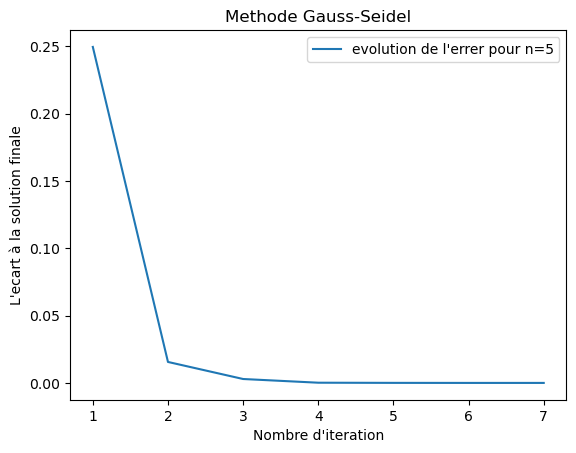

In [56]:
x,errer=my_gauss_seidal(genere_matrice_H(N)+np.eye(N),np.array([1,1,1,1,1]),[1,1,1,1,1],1e-5,300)
plt.plot(np.arange(1,len(errer)+1),errer,label=f"evolution de l'errer pour n={N}")
plt.legend()
plt.title("Methode Gauss-Seidel")
plt.xlabel("Nombre d'iteration")
plt.ylabel("L'ecart à la solution finale")

In [48]:
def cas_symetrie(A,b,x_o,epsilon,max_iter):
    """methode pour la resolution avec metode de jacobi

    Args:
        A (list(n,n)): la matrice
        b (list): le y
        x_0 (list): valeur de depart
        episo (float): condition d'arret
        max_iter (int): nombre d'iteration maximale
    """
    M=2*np.diag(np.diag(A))
    M_inver=np.diag(1/(2*np.diag(A)))
    N=M-A
    Iter=M_inver@N
    b_=M_inver@b
    x_old=x_o.copy()
    solution_interm=[] #Pour stocker les solution intermediares
    for k in range(max_iter):
        x_new=Iter@x_old+b_
        solution_interm.append(x_new)
        if np.linalg.norm(x_new-x_old)<epsilon:
            break
        x_old=x_new.copy()
    errer=calcul_errer(solution_interm,x_new)
    return x_new.copy(),errer

# Test methode proposee pour les matrices symetriques

Text(0, 0.5, "L'ecart à la solution finale")

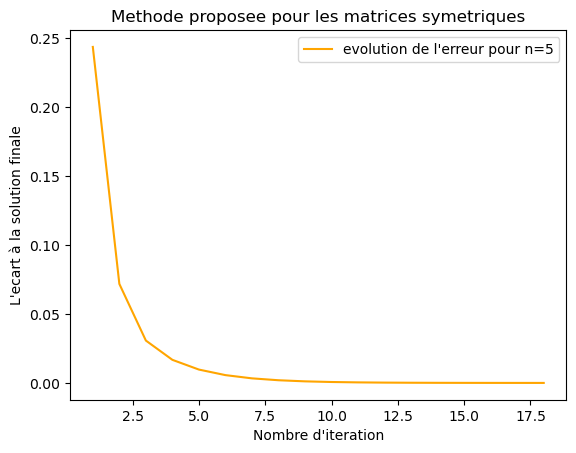

In [58]:
x,errer=cas_symetrie(genere_matrice_H(N)+np.eye(N),np.array([1,1,1,1,1]),[1,1,1,1,1],1e-5,300)
plt.plot(np.arange(1,len(errer)+1),errer,label=f"evolution de l'erreur pour n={N}",color='orange')
plt.legend()
plt.title("Methode proposee pour les matrices symetriques")
plt.xlabel("Nombre d'iteration")
plt.ylabel("L'ecart à la solution finale")

# Normes matricielles

In [117]:
def norme_l1(A):
    n=len(A)
    return max([sum([np.abs(A[i,j]) for i in range(n)]) for j in range(n)])

In [ ]:
def norme_l2(A):
    return max(np.linalg.eigvals(A)) #Je prends la valeur propre maximale

In [113]:
def norme_linfini(A):
    n=len(A)
    return max([sum([A[i,j] for j in range(n)]) for i in range(n)])

In [110]:
s=np.array([[1,2,3],[0,-4,1],[1,2,3]])
s

array([[ 1,  2,  3],
       [ 0, -4,  1],
       [ 1,  2,  3]])

In [119]:
norme_l1(s)

8

In [120]:
norme_l2(s)

4.242640687119286

In [121]:
norme_linfini(s)

6